# RQ3. Case Study: Marvel vs DC

For the purposes of this research question, we will specifically be analysing the MCU vs the DCEU.\
Any games released before these movie franchises were released are considered irrelevant for the purposes of our research.\
We split the dataframe into their respective movies and games.\
Then we analyse average ratings and vote count per year and compare the two franchises.

In [2]:
import pandas as pd
from matplotlib.pylab import plt
import numpy as np

Read in the dataframe. We will be using the merged by year dataframe to best examine the franchises performance per year

In [3]:
df = pd.read_csv("final_dataframes\\df_merged_years.csv", index_col = 0)

We filter by year here to anything after 2008 because that is when the first MCU film was released, so it only filters out games that were released before the start of either franchise

In [4]:
df = df[df["year"] > 2008]

We split the data into their respective franchises and industries to allow for ease of analysis

In [5]:
marvel_games = df[(df["franchise_name"] == "Marvel") & (df["type"] == "game")]
marvel_movies = df[(df["franchise_name"] == "Marvel Cinematic Universe (various)") & (df["type"] == "movie")]
marvel_movies["franchise_name"] = "Marvel"
marvel_games["franchise_name"] = "Marvel"

dc_games = df[(df["franchise_name"] == "DC Universe") & (df["type"] == "game")]
dc_movies = df[(df["franchise_name"] == "DC Extended Universe") & (df["type"] == "movie")]
dc_movies["franchise_name"] = "DC"
dc_games["franchise_name"] = "DC"

C:\Users\35387\AppData\Local\Temp\ipykernel_47820\154189118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marvel_movies["franchise_name"] = "Marvel"
C:\Users\35387\AppData\Local\Temp\ipykernel_47820\154189118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marvel_games["franchise_name"] = "Marvel"
C:\Users\35387\AppData\Local\Temp\ipykernel_47820\154189118.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [6]:
marvel_movies

,franchise_name,franchise_id,type,tconst,title,year,votes_average,rating_average,number_of_releases,content_per_year,...,vote_diff,rating_diff,num_of_releases_diff,running_length_years,diff_from_prev_rar,change_rel_to_rar,year_biggest_drop,pos_biggest_drop,avg_rating_pre_drop,avg_rating_post_drop
8297,Marvel,f1329,movie,tt1228705,Iron Man 2,2010,8.319540e+05,6.900000,28.0,1,...,42659.500000,-0.350000,-1.0,16,-0.116667,-0.350000,2023,100.0,7.324359,NaN
8298,Marvel,f1329,movie,"tt0800369, tt0458339","Thor, Captain America: The First Avenger",2011,8.615165e+05,6.950000,28.0,2,...,29562.500000,0.050000,1.0,16,-0.073333,-0.183333,2023,100.0,7.324359,NaN
8299,Marvel,f1329,movie,tt0848228,The Avengers,2012,1.409220e+06,8.000000,28.0,1,...,547703.500000,1.050000,-1.0,16,0.156667,0.940000,2023,100.0,7.324359,NaN
8300,Marvel,f1329,movie,"tt1300854, tt1981115","Iron Man 3, Thor: The Dark World",2013,7.801325e+05,6.950000,28.0,2,...,-629087.500000,-1.050000,1.0,16,-0.066667,-0.266667,2023,100.0,7.324359,NaN
8301,Marvel,f1329,movie,"tt1843866, tt2015381","Captain America: The Winter Soldier, Guardians...",2014,1.030418e+06,7.900000,28.0,2,...,250285.500000,0.950000,0.0,16,0.150000,0.750000,2023,100.0,7.324359,NaN
8302,Marvel,f1329,movie,"tt2395427, tt0478970","Avengers: Age of Ultron, Ant-Man",2015,7.835825e+05,7.300000,28.0,2,...,-246835.500000,-0.600000,0.0,16,0.000000,0.000000,2023,100.0,7.324359,NaN
8303,Marvel,f1329,movie,"tt3498820, tt1211837","Captain America: Civil War, Doctor Strange",2016,7.826980e+05,7.650000,28.0,2,...,-884.500000,0.350000,0.0,16,0.050000,0.350000,2023,100.0,7.324359,NaN
8304,Marvel,f1329,movie,"tt3896198, tt3501632","Guardians of the Galaxy Vol. 2, Thor: Ragnarok",2017,7.341565e+05,7.750000,28.0,2,...,-48541.500000,0.100000,0.0,16,0.050000,0.400000,2023,100.0,7.324359,NaN
8305,Marvel,f1329,movie,"tt1825683, tt4154756, tt5095030","Black Panther, Avengers: Infinity War, Ant-Man...",2018,7.760580e+05,7.566667,28.0,3,...,41901.500000,-0.183333,1.0,16,0.026316,0.166667,2023,100.0,7.324359,NaN
8306,Marvel,f1329,movie,"tt4154664, tt4154796","Captain Marvel, Avengers: Endgame",2019,8.707255e+05,7.600000,28.0,2,...,94667.500000,0.033333,-1.0,16,0.016541,0.173684,2023,100.0,7.324359,NaN


This gives us an overall view of how our data is distributed.\
Clearly Marvel is producing more content overall.

In [38]:
df_stats = pd.DataFrame({
    'Marvel': [marvel_movies["content_per_year"].sum(), marvel_games["content_per_year"].sum()],
    'DC': [dc_movies["content_per_year"].sum(), dc_games["content_per_year"].sum()]
}, index=['Movies', 'Games'])
df_stats

,Marvel,DC
Movies,26,12
Games,52,33


Add colour coding for the 2 franchises.\
*Note: we were going to use red for the Marvel franchise as it seems to their most associated colour but by now we had already used red to identify games in any previous graphs, so we chose green instead. If anyone asks it represents the Hulk.*

In [7]:
dc_colour = "black"
marvel_colour = "limegreen"

Also add variables for the graphs font sizes

In [8]:
plot_title_size = 30
subplot_title_size = 25
axis_label_size = 22
tick_label_size = 15
alpha = 0.5
width = 0.4

Set x axis tick range and spacing for all graphs

In [9]:
years = range(2008,2024,2)

## Release of Content

As we highlighted above, Marvel has a clear lead in terms of content released but we wanted to explore how that was distributed over the years.\
It will help us to visualise the data as we perform analysis on ratings/votes per year later

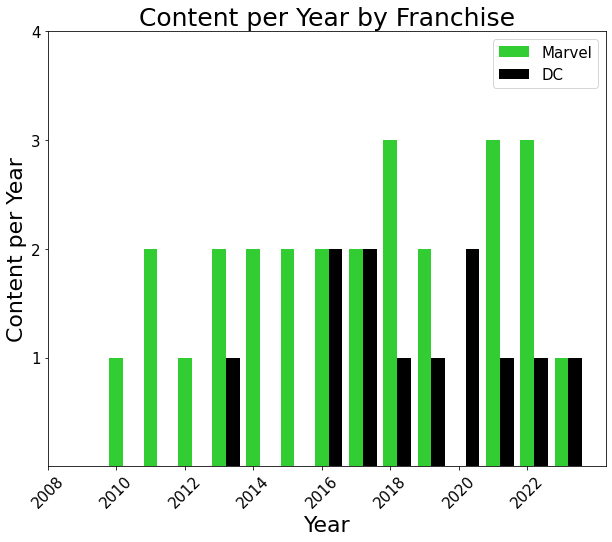

In [10]:
count = [1,2,3,4]

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))



# plot the bar charts for each franchise
ax.bar(marvel_movies["year"], marvel_movies["content_per_year"], width=width, label="Marvel", color = marvel_colour)
ax.bar(dc_movies["year"]+width, dc_movies["content_per_year"], width=width, label="DC", color = dc_colour)

# set the x and y axis labels and title
ax.set_xlabel("Year", fontsize=axis_label_size)
ax.set_ylabel("Content per Year", fontsize=axis_label_size)
ax.set_title("Content per Year by Franchise",fontsize = subplot_title_size)

# set the x-tick labels to be the year values
ax.set_xticks(years)
ax.set_yticks(count)
ax.tick_params(axis="x", labelrotation=45)
# add the legend
plt.xticks(fontsize=tick_label_size)
plt.yticks(fontsize=tick_label_size)
# add the legend
ax.legend(fontsize=tick_label_size)

# show the plot
plt.show()

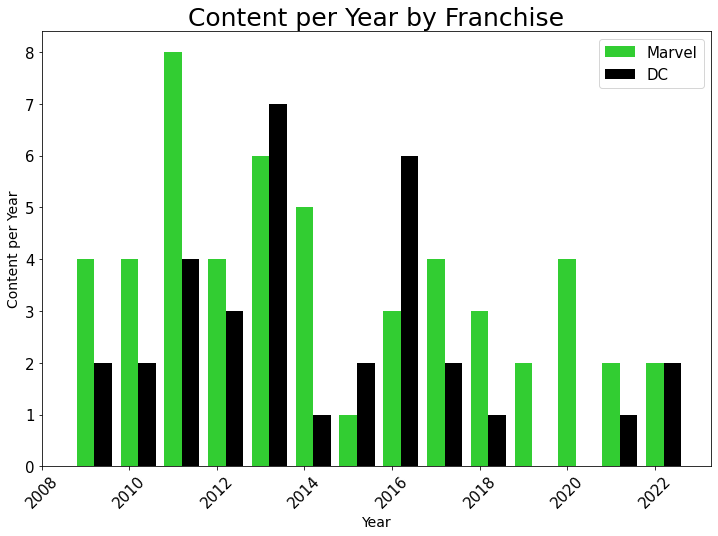

In [40]:
count = range(0,9,1)

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.4

# plot the bar charts for each franchise
ax.bar(marvel_games["year"], marvel_games["content_per_year"], width=width, label="Marvel", color = marvel_colour)
ax.bar(dc_games["year"]+width, dc_games["content_per_year"], width=width, label="DC", color = dc_colour)

# set the x and y axis labels and title
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Content per Year", fontsize=14)
ax.set_title("Content per Year by Franchise",fontsize = subplot_title_size)

# set the tick labels
ax.set_xticks(years)
ax.set_yticks(count)

ax.tick_params(axis="x", labelrotation=45)
plt.xticks(fontsize=tick_label_size)
plt.yticks(fontsize=tick_label_size)
# add the legend
ax.legend(fontsize=tick_label_size)

# show the plot
plt.show()

## Rating

Now that we know how our content has been released, we can start to look at how each franchise performed over that span of time.

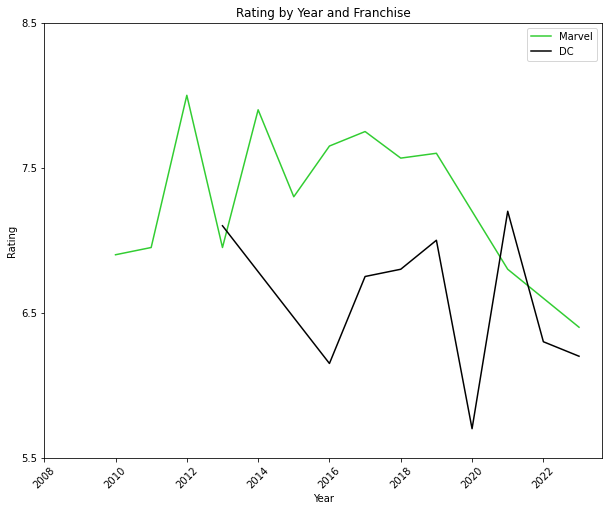

In [12]:
# create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# plot the line chart for franchise 1
marvel_movies.plot(x="year", y="rating_average", label="Marvel", ax=ax, color = marvel_colour)

# plot the line chart for franchise 2
dc_movies.plot(x="year", y="rating_average", label="DC", ax=ax, color = dc_colour)

# set the x and y axis labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Rating")
ax.set_title("Rating by Year and Franchise")

ax.set_ylim(5.5,8)
ax.set_yticks(np.arange(5.5, 9))


ax.set_xticks(years)
ax.tick_params(axis="x", labelrotation=45)
 
# add the legend
ax.legend()

# show the plot
plt.show()

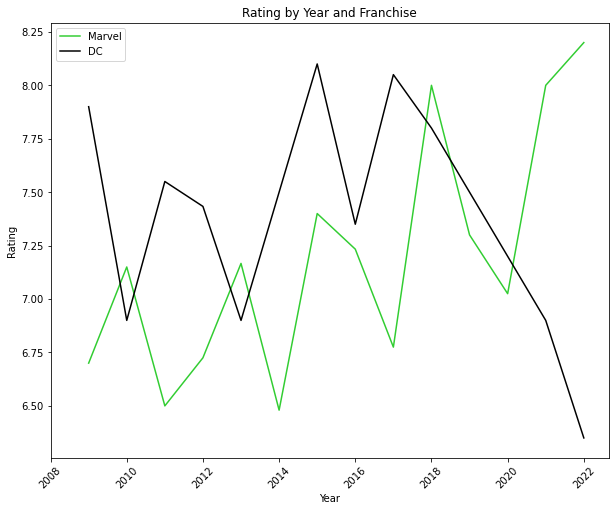

In [13]:
# create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# plot the line chart for franchise 1
marvel_games.plot(x="year", y="rating_average", label="Marvel", ax=ax, color = marvel_colour)

# plot the line chart for franchise 2
dc_games.plot(x="year", y="rating_average", label="DC", ax=ax, color = dc_colour)

# set the x and y axis labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Rating")
ax.set_title("Rating by Year and Franchise")


ax.set_xticks(years)
ax.tick_params(axis="x", labelrotation=45)
# add the legend
ax.legend()

# show the plot
plt.show()

As we have stated in a previous notebook, games on average tend to receive higher ratings than movies.\
We thought it would be interesting to see if the same held true for franchises as well known as these, so we decided to graph both datasets together

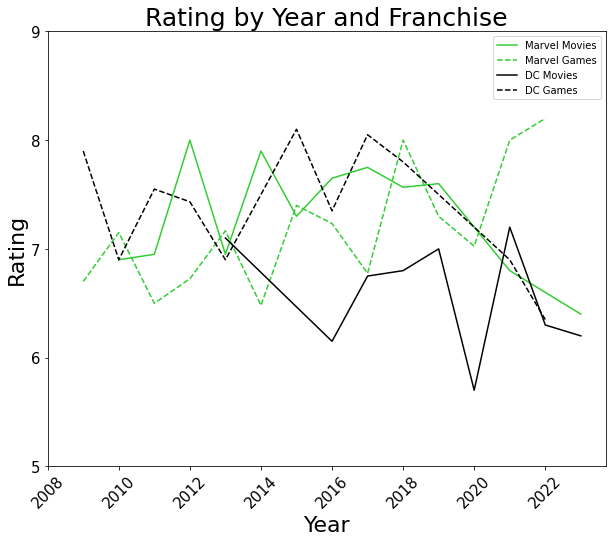

In [14]:
rating = range(5,10,1)
# create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# plot the line chart for franchise 1
marvel_movies.plot(x="year", y="rating_average", label="Marvel Movies", ax=ax, color = marvel_colour)
marvel_games.plot(x="year", y="rating_average", label="Marvel Games", ax=ax, color = marvel_colour, linestyle='--')

# plot the line chart for franchise 2
dc_movies.plot(x="year", y="rating_average", label="DC Movies", ax=ax, color = dc_colour)
dc_games.plot(x="year", y="rating_average", label="DC Games", ax=ax, color = dc_colour, linestyle='--')

# set the x and y axis labels and title
ax.set_xlabel("Year", fontsize=axis_label_size)
ax.set_ylabel("Rating", fontsize=axis_label_size)
ax.set_title("Rating by Year and Franchise", fontsize=subplot_title_size)


ax.set_xticks(years)
ax.set_yticks(rating)
plt.xticks(fontsize=tick_label_size)
plt.yticks(fontsize=tick_label_size)

ax.tick_params(axis="x", labelrotation=45)
# add the legend
ax.legend()

# show the plot
plt.show()

## Votes Difference

For the votes difference, we thought it would be interesting to see how each franchise performed against one another as a whole.\
We decided to use this stacked bar chart to measure our votes, making the total height a graph of 100%, meaning any variance above or below that 50% line indicates a more successful year for that franchise.\
*Note: the years where only one franchise released content will show a 100% mark for that franchise, this is not what we're interested in for the sake of comparison*

In [15]:
movies_df = pd.concat([marvel_movies, dc_movies])
games_df = pd.concat([marvel_games, dc_games])

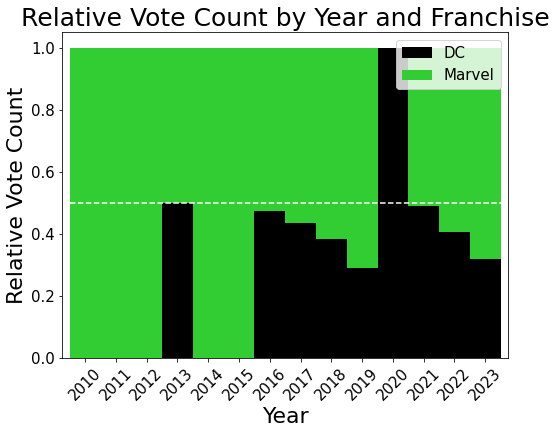

In [16]:
# group the data by year and franchise name, and compute the total vote count for each group
grouped = movies_df.groupby(["year", "franchise_name"])["votes_average"].sum()

# normalize the histogram to have a total area of 1
density = True

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# create a stacked bar chart of the relative vote count for each franchise per year
grouped.groupby("year").apply(lambda x: x / float(x.sum())).unstack().plot(kind="bar", stacked=True, ax=ax, width = 1.0, color = [dc_colour, marvel_colour])


ax.axhline(y=0.5, color='white', linestyle='--')

# label graph
ax.set_xlabel("Year", fontsize=axis_label_size)
ax.set_ylabel("Relative Vote Count", fontsize=axis_label_size)
ax.set_title("Relative Vote Count by Year and Franchise", fontsize=subplot_title_size)

# 
plt.xticks(fontsize=tick_label_size)
plt.yticks(fontsize=tick_label_size)

ax.legend(fontsize=tick_label_size)

ax.tick_params(axis="x", labelrotation=45)

plt.show()

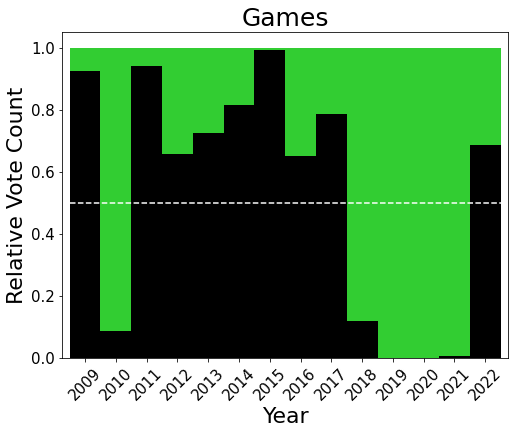

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

# normalize the histogram to have a total area of 1
density = True

# group the data by year and franchise name, and compute the total vote count for each group
grouped_games = games_df.groupby(["year", "franchise_name"])["votes_average"].sum()

# create a stacked bar chart of the relative vote count for each franchise per year
grouped_games.groupby("year").apply(lambda x: x / float(x.sum())).unstack().plot(kind="bar", stacked=True, ax=ax, width = 1.0, color = [dc_colour, marvel_colour])

ax.axhline(y=0.5, color='white', linestyle='--')

# set the x and y axis labels and title
ax.set_xlabel("Year", fontsize=axis_label_size)
ax.set_ylabel("Relative Vote Count", fontsize=axis_label_size)
ax.set_title("Games", fontsize=subplot_title_size)

ax.tick_params(axis="x", labelrotation=45)

ax.tick_params(axis='both', which='major', labelsize=tick_label_size)

ax.legend().remove()

## Final Graphs

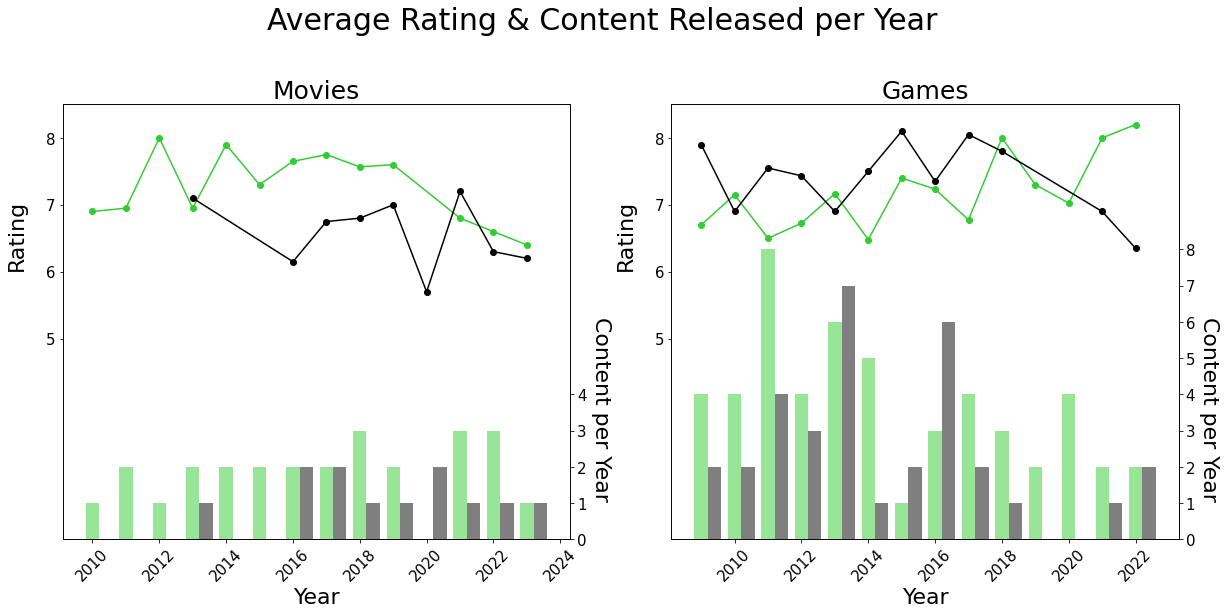

In [41]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8))

marvel_movies.plot(x="year", y="rating_average", label="Marvel", ax=axs[0], color = marvel_colour, marker = "o")

# plot the line chart for franchise 2
dc_movies.plot(x="year", y="rating_average", label="DC", ax=axs[0], color = dc_colour, marker = "o")
axs[0].tick_params(axis="x", labelrotation=45)
axs[0].set_ylim(2,8.5)
axs[0].set_yticks(np.arange(5, 8.5))

axs[0].set_xlabel("Year", fontsize=axis_label_size)
axs[0].set_ylabel("Rating", fontsize=axis_label_size)
axs[0].set_title("Movies", fontsize=subplot_title_size)
axs[0].yaxis.set_label_coords(-0.07, 0.7)

ax2 = axs[0].twinx()

ax2.bar(marvel_movies["year"], marvel_movies["content_per_year"], width=width, label="Marvel", color = marvel_colour, alpha = alpha)
ax2.bar(dc_movies["year"]+width, dc_movies["content_per_year"], width=width, label="DC", color = dc_colour, alpha = alpha)


# set the x and y axis labels and title
ax2.set_ylabel("Content per Year", fontsize=axis_label_size, rotation = 270)
ax2.set_ylim(0,12)
ax2.set_yticks(np.arange(0, 5))
ax2.yaxis.set_label_coords(1.08, 0.3)



marvel_games.plot(x="year", y="rating_average", ax=axs[1], color = marvel_colour, marker = "o")

# plot the line chart for franchise 2
dc_games.plot(x="year", y="rating_average", ax=axs[1], color = dc_colour, marker = "o")

axs[1].tick_params(axis="x", labelrotation=45)
axs[1].set_ylim(2,8.5)
axs[1].set_yticks(np.arange(5, 8.5))


axs[1].set_xlabel("Year", fontsize=axis_label_size)
axs[1].set_ylabel("Rating", fontsize=axis_label_size)
axs[1].set_title("Games", fontsize = subplot_title_size)
axs[1].yaxis.set_label_coords(-0.07, 0.7)

ax3 = axs[1].twinx()

ax3.bar(marvel_games["year"], marvel_games["content_per_year"], width=width, color = marvel_colour, alpha = alpha)
ax3.bar(dc_games["year"]+width, dc_games["content_per_year"], width=width, color = dc_colour, alpha = alpha)


# set the x and y axis labels and title
ax3.set_ylabel("Content per Year", fontsize=axis_label_size, rotation = 270)
ax3.set_ylim(0,12)
ax3.set_yticks(np.arange(0, 9))
ax3.yaxis.set_label_coords(1.08, 0.3)

axs[0].legend().remove()
axs[1].legend().remove()

axs[1].tick_params(axis='both', which='major', labelsize=tick_label_size)
axs[0].tick_params(axis='both', which='major', labelsize=tick_label_size)
ax2.tick_params(axis='y', which='major', labelsize=tick_label_size)
ax3.tick_params(axis='y', which='major', labelsize=tick_label_size)

        
fig.suptitle("Average Rating & Content Released per Year", fontsize = plot_title_size, y = 1.05)

fig.savefig("MvDC_Rating.png", facecolor='white', bbox_inches='tight')

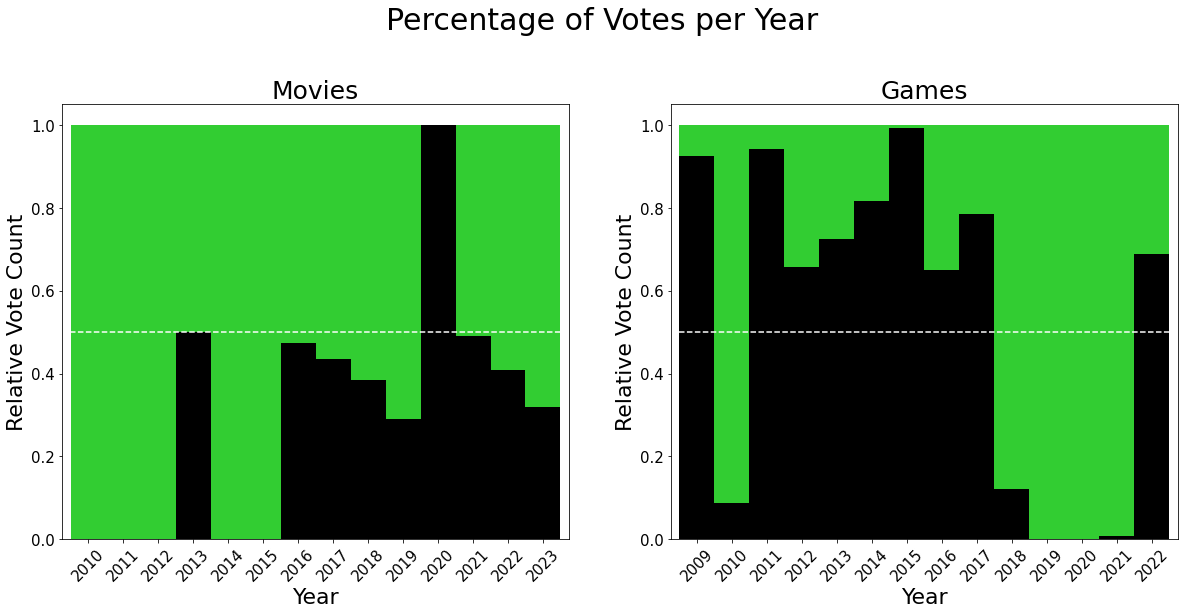

In [42]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8))


grouped_movies = movies_df.groupby(["year", "franchise_name"])["votes_average"].sum()

# normalize the histogram to have a total area of 1
density = True

# create a stacked bar chart of the relative vote count for each franchise per year
grouped_movies.groupby("year").apply(lambda x: x / float(x.sum())).unstack().plot(kind="bar", stacked=True, ax=axs[0], width = 1.0, color = [dc_colour, marvel_colour])


axs[0].axhline(y=0.5, color='white', linestyle='--')

# set the x and y axis labels and title
axs[0].set_xlabel("Year", fontsize=axis_label_size)
axs[0].set_ylabel("Relative Vote Count", fontsize=axis_label_size)
axs[0].set_title("Movies", fontsize=subplot_title_size)

# add the legend
#axs[0].legend(fontsize=12)

axs[0].tick_params(axis="x", labelrotation=45)

# group the data by year and franchise name, and compute the total vote count for each group
grouped_games = games_df.groupby(["year", "franchise_name"])["votes_average"].sum()

# create a stacked bar chart of the relative vote count for each franchise per year
grouped_games.groupby("year").apply(lambda x: x / float(x.sum())).unstack().plot(kind="bar", stacked=True, ax=axs[1], width = 1.0, color = [dc_colour, marvel_colour])

axs[1].axhline(y=0.5, color='white', linestyle='--')

# set the x and y axis labels and title
axs[1].set_xlabel("Year", fontsize=axis_label_size)
axs[1].set_ylabel("Relative Vote Count", fontsize=axis_label_size)
axs[1].set_title("Games", fontsize=subplot_title_size)

#]]axs[1].set_xticks(range(5, 10)[::5])
axs[1].tick_params(axis="x", labelrotation=45)

axs[1].tick_params(axis='both', which='major', labelsize=tick_label_size)
axs[0].tick_params(axis='both', which='major', labelsize=tick_label_size)
#axs[0].legend(labels=[])
#axs[1].legend(loc="upper right", fontsize = 16, bbox_to_anchor=(1, 0.95))

axs[0].legend().remove()
axs[1].legend().remove()
fig.suptitle("Percentage of Votes per Year", fontsize = plot_title_size, y = 1.05)

fig.savefig("MvDC_Votes.png", facecolor='white', bbox_inches='tight')

Stretch goal:
Include a graph that indicates the number of votes received by franchise comparing their own movies and games to each other.\
*Note this may not work as IMDB has a highly skewed number of votes in favour of movies, but it might be interesting*